# Airline Customer Value Analysis through LRFMC Indicators by Performing K-Means Clustering Algorithm

**A lil bit INTRODUCTION**

Hi, I'm Selpha Yulida, a data enthusiast that just started my data learning journey through joining Dibimbing bootcamp Data Science Batch 13. This dataset is customer airline data extracted by airlines with 2014-03-31 as the end time. The detailed data is including the basic customer information such as frequent flyer information, as well as the other flight information.

This dataset consists of 62988 rows and 23 columns. In this project, we will do airline customer value analysis through LRFMC indicators by performing K-Means clustering algorithm.

Please kindly connect to my LinkedIn https://www.linkedin.com/in/selphayulida/ and visit my Github https://github.com/selphayulida/

Thank You in Advance!

**Please kindly note that the highlight of this project is performing K-Means clustering algorithm for customer value analysis through LRFMC indicators, so there may be some steps missed**

# Background & The Steps

**Background**
- Along with the development of information and technology accompanied by increasingly fierce business competition, the company is trying to shift from a product-centric approach to a customer-centric approach.
- A customer-centric approach will enable companies to create better relationships with customers, prioritize customer needs, and increase customer retention, which will lead to increased company profits.
- For this reason, companies need to classify customers accurately, formulate personalized service plans based on the classification results, and optimize enterprise marketing resource allocation plans.
- The aviation company's marketing team can establish a reasonable customer value evaluation model, segment customers, analyze and compare the value of customers from different groups, and formulate appropriate marketing strategies to provide personalized customer service according to customer needs.


**The steps in this project include:**
- Data collection.
- Data understanding by performing the statistic descriptive of data and check correlation among features by correlation matrix.
- Data preprocessing that includes handling missing value, feature selection based on LRFMC, handling outlier and also data scaling.
- Clustering process by K-Means algorithm
- Analyze the result - customer value analysis

#  Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.5
pandas version :  1.1.5
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [3]:
# Load Dataset 'flight.csv'

df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

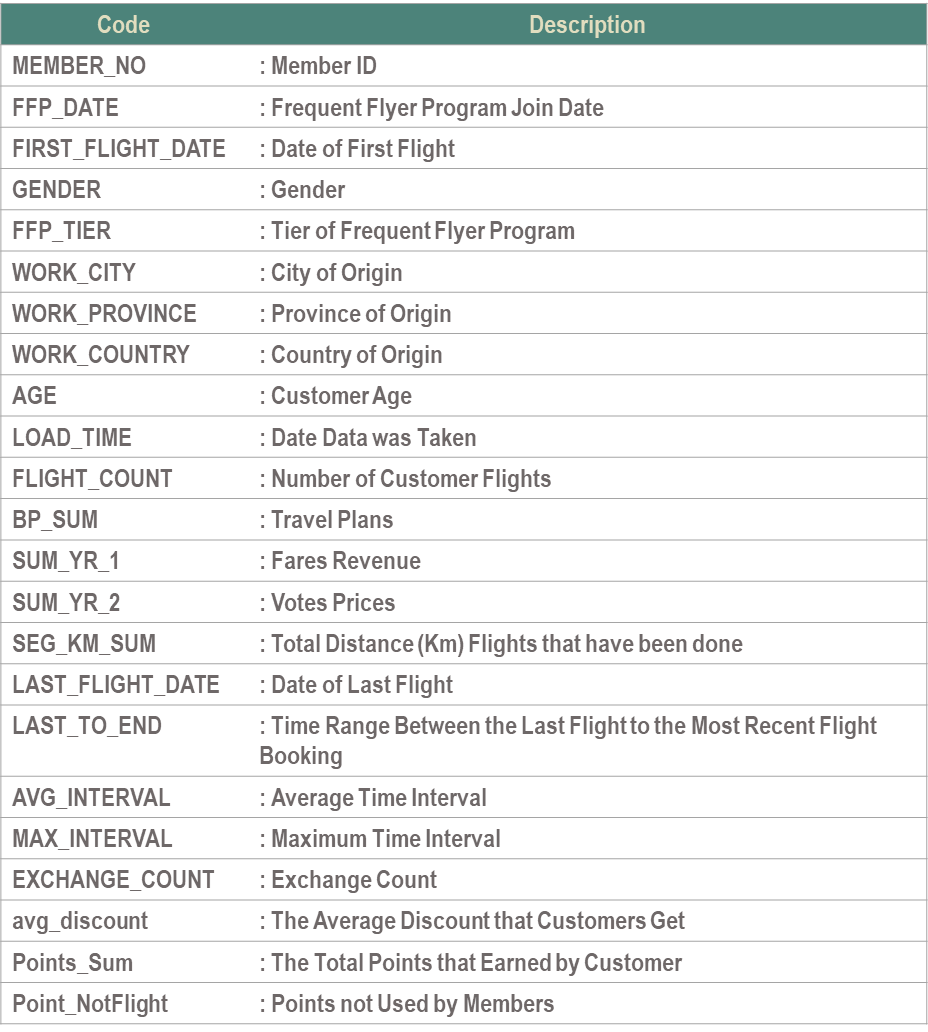

There are 62988 rows and 23 columns. There are some missing values on some columns, but we will handle later. Some columns have data type that have not appropriate. So, let's change the data type for some columns.

Some columns have to convert from object type to DateTime type.

In [5]:
# Change object to dateandtime type

df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

In [6]:
# Check all columns data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

Some data types have been changed.

## Statistic Descriptive for Numerical Data

Performing statistic descriptive for all numerical data exclude `MEMBER_NO` column, since it is not needed for our analysis.

In [7]:
# Statistic descriptive for numerical data (excld `MEMBER_NO`)

df.drop(['MEMBER_NO'],axis=1).describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Here are some observations from the statistical summary of numerical data:

- There are 14 numeric columns after dropping `MEMBER_NO` column
- There are some columns that seem to have a normal distribution which mean equal/close to median value. Those columns are `FFP_TIER`, `AGE`, `avg_discount`.
- Other columns seem to have a positive skew distribution which mean > median value.
- Some columns have value of 0. For the example it can be seen in the `SUM_YR_1` and `SUM_YR_2` columns which is a bit strange if fare with 0 value. So those kind of columns need to be checked further.
- `AGE` (Customer Age) column  ranged between 6-110, with mean 42yo and median 41yo. A bit strange that there are over 100yo. Looks like it needs to be checked further if required to analyze using that data.

## Statistic Descriptive for Categorical Data

Performing statistic descriptive for all categorical data.

In [8]:
# Statistic descriptive for object data

df.select_dtypes('object').describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


Here are some observations from the statistical summary of object data type:
- Most of customer of this airline is Male which is around 76.42%.
- The top city of origin is Guangzhou which is 15.46%.
- The top province of origin is Guangdong which is 29.31%.
- The top country of origin is CN (China) which is 91.72%.
- Guangzhou is a city in Guangdong Province - China.
- Seems that this is China's airline data.

In [9]:
# Statistic descriptive for datetime data

df.select_dtypes('datetime64').describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62567
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


Here are some observations from the statistical summary of datetime data type:
- From `FFP_DATE` (Frequent Flyer Program Join Date), we know that many customers joined the program on 13 January 2011. with a ddmmyy range from the 1 November 2004 to 31 March 2013.
- Based on column `FIRST_FLIGHT_DATE` (Customer's Date of First Flight), we get the information that many customers have their first flight (on this airline) on 16 February 2013, where the time range ranges from 31 December 1905 to 30 May 2015.
- On column `LAST_FLIGHT_DATE`(Customer Date of Last Flight), it can be seen that many customers have their last flight on 31 March 2014 during time range between 1 April 2012 till 31 March 2014.
- Based on `LOAD_TIME` column, seems that the data was taken on 31 March 2014. This will be the cut off date of this dataset on this project.

## Correlation Matrix 

in order to understand some variables/ features that correlated each other, we will show the correlation matrix.

<AxesSubplot:>

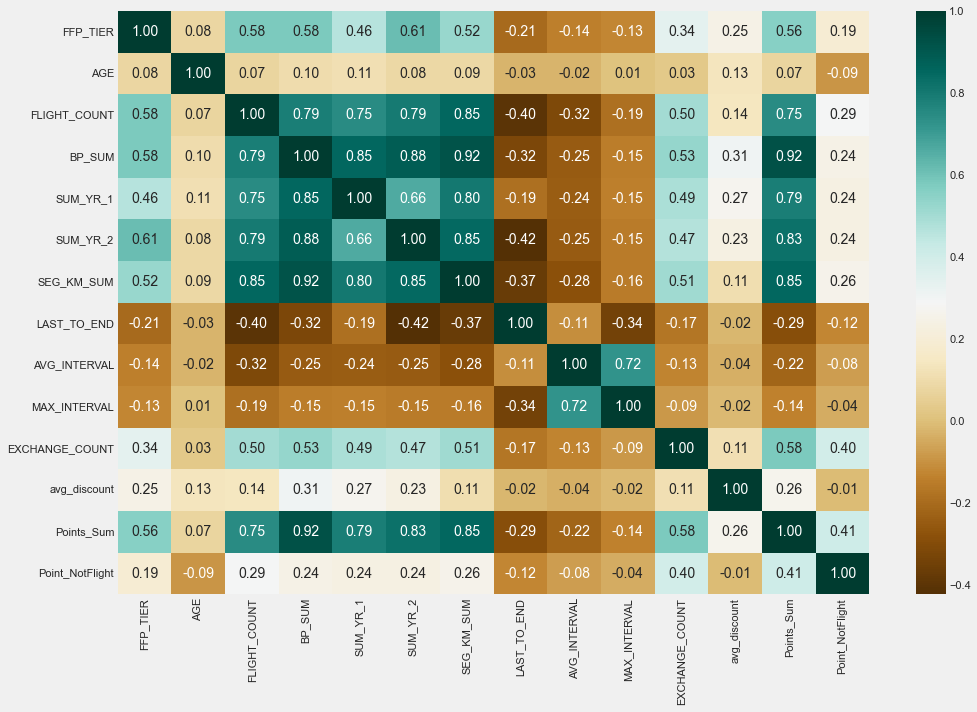

In [10]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = df.drop(['MEMBER_NO'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='BrBG', fmt='.2f')

From the correlation heatmap above, It can be seen that there are some features that have a high correlation with other features, such as:
- FLIGHT_COUNT (Number of Customer Flights)
- BP_SUM (Travel Plans)
- SUM_YR_1 (Fares Revenue)
- SUM_YR_2 (Votes Prices)
- SEG_KM_SUM (Total Distance (Km) Flights that have been done)
- Points_Sum (The Total Points that Earned by Customer)

# Data Preprocessing 

## Handling Missing Values

In [11]:
# Make table summary of missing value count with the percentage

data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,LAST_FLIGHT_DATE,421,0.668
4,AGE,420,0.667
5,SUM_YR_2,138,0.219
6,WORK_COUNTRY,26,0.041
7,GENDER,3,0.005


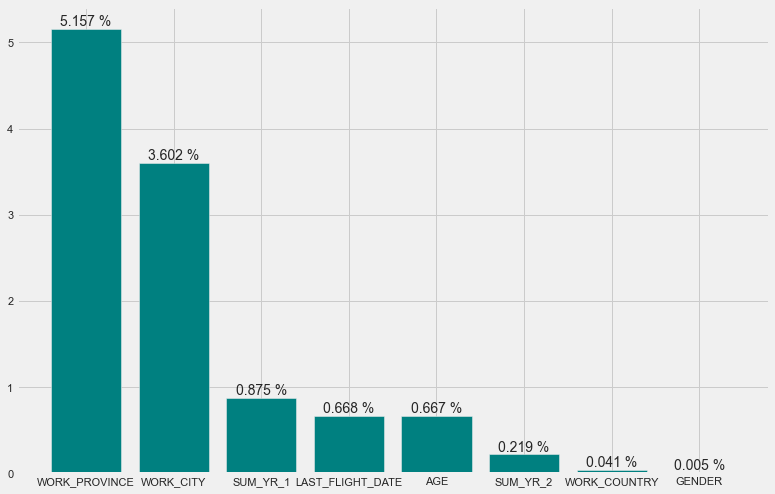

In [12]:
# Plot in bar chart for better visualization

fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(x=data_nan['feature'], height= data_nan['percentage'], color = 'teal')

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

Because the number of missing values can be categorized as still small, then we will just drop it.

In [13]:
# Drop missing values

df = df.dropna().reset_index(drop=True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
57856,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
57857,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
57858,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


In [14]:
# Recheck the existance of missing values

df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [15]:
# Check rows of data after dropping missing values

df.shape

(57860, 23)

All missing values have been dropped. Number of rows become 57860.

## Feature Selection based on LRFMC Model

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because the frequency and monetary value affect a customer’s lifetime value, and recency affects retention, a measure of engagement.

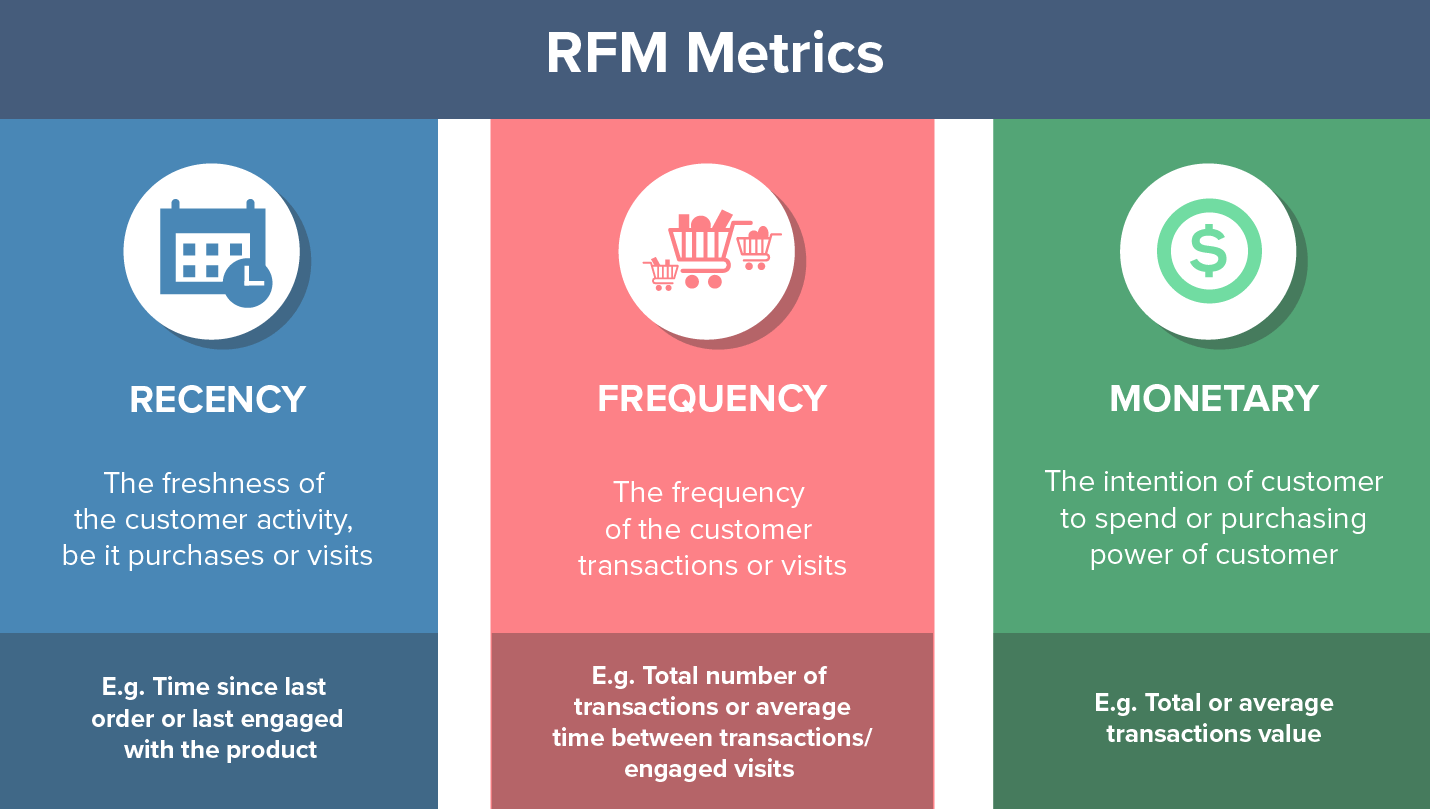
Image source: https://clevertap.com/blog/rfm-analysis/

In this project, we extend the RFM model to have 5 indicators namely LRFMC. Since the length of time for airline members to join a meeting can affect customer value to a certain extent, so we add the L indicator. Apart from that, the average value C of the discount coefficient is also used as an airline identification customer value indicator, so that is why we add the C indicator too.

In this project we will use the LRFMC indicator for clustering customers, so we will select only those features.
- L = LOAD_TIME - FFP_DATE

The number of months since the member ’s membership time from the end of the observation window = end time of the observation window-time to join (unit: month).

- R = LAST_TO_END

The number of months since the customer ’s most recent flight to the end of the observation window = the time from the last flight to the end of the observation window (Unit: month).

- F = FLIGHT_COUNT

The number of times the customer took the company aircraft in the observation window = the number of flights in the observation window (unit: times]

- M = SEG_KM_SUM

The accumulated mileage of the customer in the company during the observation period = the total number of flight kilometers in the observation window (unit: km)

- C = AVG_DISCOUNT

The average value of the discount coefficients corresponding to the passengers who traveled during the observation period = average discount rate (unit: none)

In [16]:
# make a dataframe RFMC first based on above information
df_LRFMC = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].reset_index()

# make L indicator by subtracting the values of column LOAD_TIME and FFP_DATE
# and calculate the date difference in months by dividing the result by 30
df_LRFMC['L'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30

# rename column name since we want to be seen as RFMC
df_LRFMC.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

# reorder the column to be LRFMC
ColumnsTitles = ['L', 'R', 'F', 'M', 'C']
df_LRFMC = df_LRFMC.reindex(columns=ColumnsTitles)
df_LRFMC

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692
...,...,...,...,...,...
57855,14.500000,437,2,3848,0.000000
57856,34.866667,297,2,1134,0.000000
57857,49.466667,89,4,8016,0.000000
57858,97.433333,29,2,2594,0.000000


We've successfully create the LRFMC features in a dataframe based on original data. This data that will be used further for clustering process to get customer value analysis.

## Handling Outlier

Check the distribution data before outlier handling.

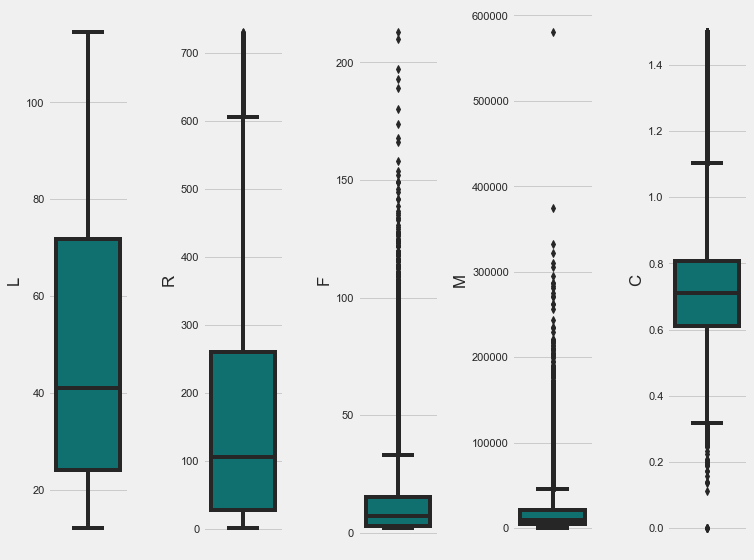

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

There are outliers on this data. We'll reduce the outlier by performing log transformation. If the outliers are still exist, we'll remove them based on IQR.

### Log Transformation to Reduce Outlier

In [18]:
# create a dataframe that values are log-transformed

df_log_LRFMC = df_LRFMC.copy()
df_log_LRFMC['L'] = np.log10(df_LRFMC['L'] + 1)
df_log_LRFMC['R'] = np.log10(df_LRFMC['R'] + 1)
df_log_LRFMC['F'] = np.log10(df_LRFMC['F'] + 1)
df_log_LRFMC['M'] = np.log10(df_LRFMC['M'] + 1)
df_log_LRFMC['C'] = np.log10(df_LRFMC['C'] + 1)
df_log_LRFMC

,L,R,F,M,C
0,1.959995,0.301030,2.324282,5.763965,0.292619
1,1.945304,1.079181,2.133539,5.452879,0.353084
2,1.840315,1.991226,1.380211,5.449227,0.320327
3,1.789110,0.778151,2.184691,5.491262,0.294611
4,1.879096,1.903090,1.968483,5.469212,0.293957
...,...,...,...,...,...
57855,1.190332,2.641474,0.477121,3.585348,0.000000
57856,1.554691,2.474216,0.477121,3.054996,0.000000
57857,1.703005,1.954243,0.698970,3.904012,0.000000
57858,1.993142,1.477121,0.477121,3.414137,0.000000


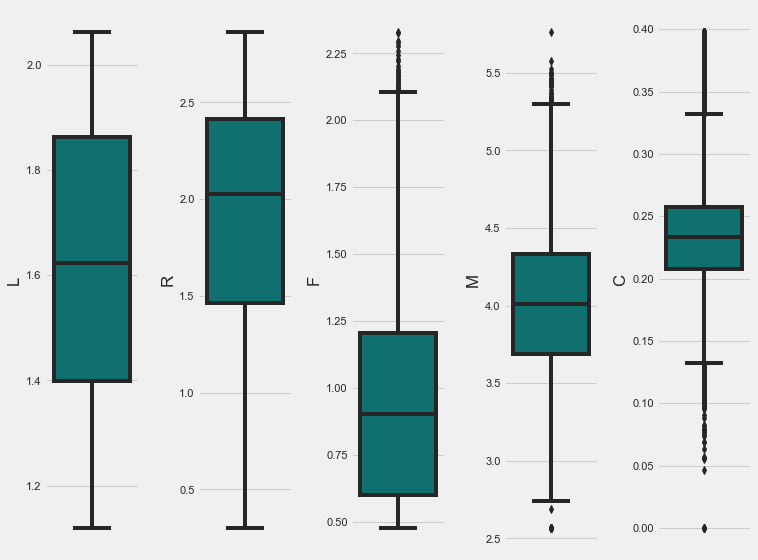

In [19]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_log_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_log_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

There are still outliers, so we will remove them based on IQR.

### Remove Outlier based on IQR

In [20]:
df_log_LRFMC.describe()

,L,R,F,M,C
count,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000
mean,1.621407,1.905263,0.947588,4.016779,0.233304
std,0.262555,0.637949,0.362379,0.440114,0.045156
min,1.119476,0.301030,0.477121,2.567026,0.000000
25%,1.398519,1.462398,0.602060,3.688687,0.207370
50%,1.623249,2.025306,0.903090,4.008983,0.233359
75%,1.862330,2.415390,1.204120,4.332842,0.257278
max,2.062833,2.864511,2.330414,5.763965,0.397940


In [21]:
# Define IQR = Q3 - Q1
IQR = df_log_LRFMC.quantile(0.75) - df_log_LRFMC.quantile(0.25)
# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_log_LRFMC.quantile(0.75) + 1.5 * IQR
# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_log_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'rows before IQR outlier filter: {len(df_log_LRFMC)}')

# Filter data between the limits
df_IQR_LRFMC = df_log_LRFMC.copy()
df_IQR_LRFMC = df_log_LRFMC[(df_log_LRFMC >= lower_limit) & (df_log_LRFMC <= upper_limit)]
    
# drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('rows after IQR outlier filter', len(df_IQR_LRFMC))
df_IQR_LRFMC

rows before IQR outlier filter: 57860
rows after IQR outlier filter 55220


,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55215,1.877755,2.359835,0.477121,2.752048,0.228124
55216,1.728083,2.416641,0.477121,2.954725,0.152288
55217,1.818226,2.322219,0.477121,2.956649,0.150756
55218,1.680033,2.675778,0.477121,2.921686,0.146128


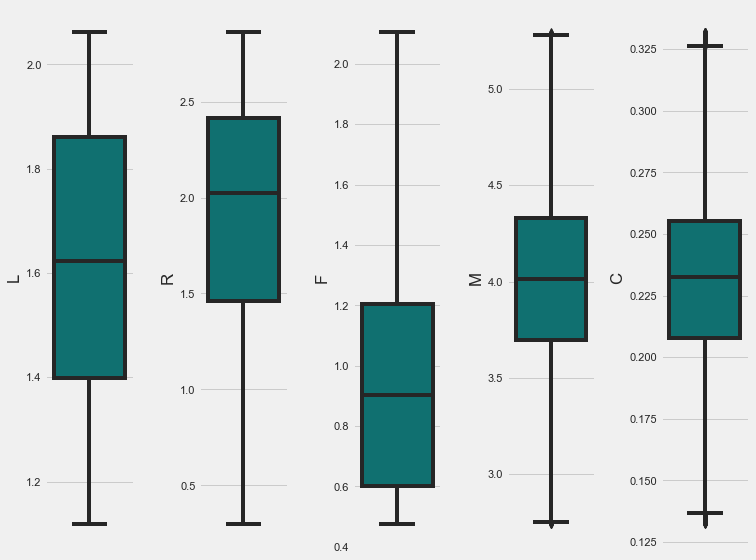

In [22]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_IQR_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_IQR_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

It looks OK.

## Handling Duplicated Value after Removing Outlier

In [23]:
# Check duplicated value after removing outlier
df_IQR_LRFMC.duplicated().sum()

78

78 is considering small qty, so we will just drop them.

In [24]:
# Drop duplicated value
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC

,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55137,1.877755,2.359835,0.477121,2.752048,0.228124
55138,1.728083,2.416641,0.477121,2.954725,0.152288
55139,1.818226,2.322219,0.477121,2.956649,0.150756
55140,1.680033,2.675778,0.477121,2.921686,0.146128


## Scaling

Because K-Means is a distance-based ML algorithm, we will first scale it with StandardScaler.

In [25]:
# Standardize data 

std = StandardScaler().fit_transform(df_IQR_LRFMC)
df_std_LRFMC = pd.DataFrame(std, columns = list(df_IQR_LRFMC))
df_std_LRFMC

,L,R,F,M,C
0,1.638865,-0.567751,1.254030,2.899821,2.436112
1,-1.074189,-2.522903,3.064036,2.888030,2.021912
2,1.661903,-1.102449,2.233282,2.689878,2.767354
3,0.208871,-1.667148,2.739982,2.883933,1.551613
4,0.222830,-1.495477,1.515226,2.753655,2.263657
...,...,...,...,...,...
55137,0.982026,0.715355,-1.320471,-2.917142,-0.075190
55138,0.409956,0.804703,-1.320471,-2.450463,-2.157817
55139,0.754495,0.656189,-1.320471,-2.446033,-2.199887
55140,0.226301,1.212296,-1.320471,-2.526536,-2.326994


# Clustering K-Means

Finding the ideal n-clusters using the Inertia and Silhouette Score.

## Inertia

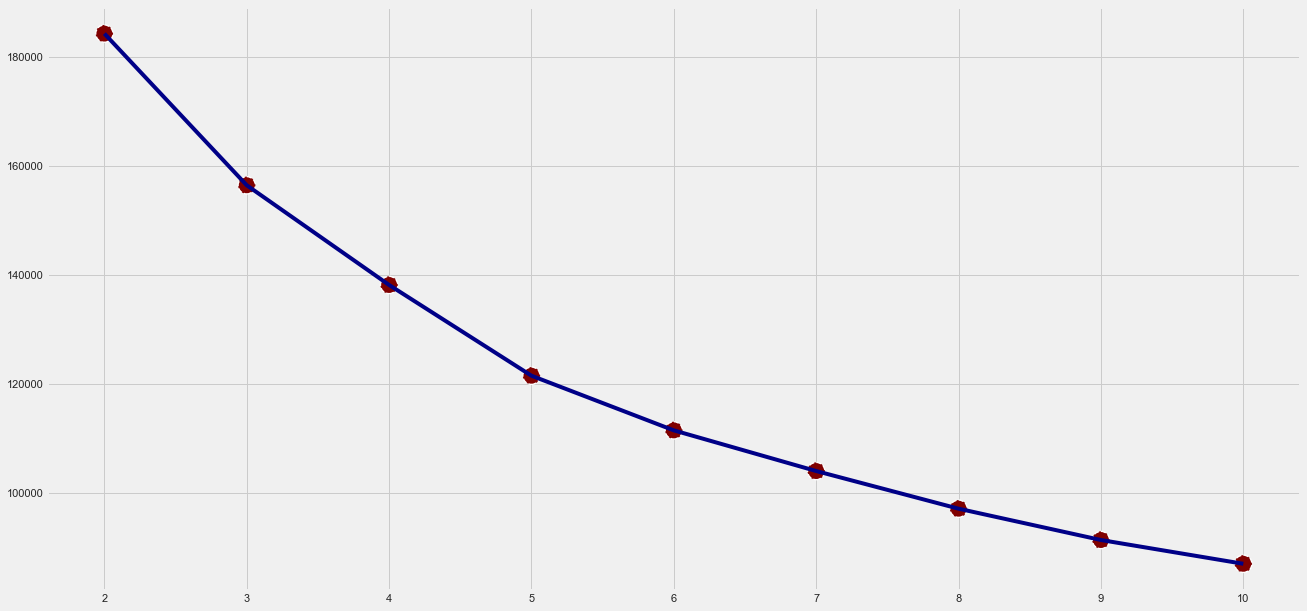

In [26]:
# yeah...!!! let's do elbow method

inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_LRFMC)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In the graph above, at a glance, the elbow point looks similar to the point k=4, 5, etc. To make sure we will check the value using Silhouette Score.

## Silhouette Score

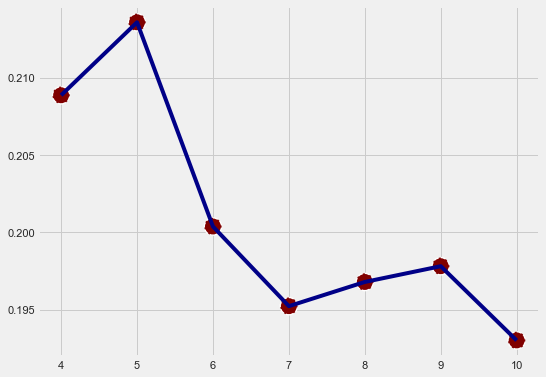

In [27]:
# we will check for 4 - 11 cluster

range_n_clusters = list(range(4,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_LRFMC)
    preds = kmeans.predict(df_std_LRFMC)
     
    score_euclidean = silhouette_score(df_std_LRFMC, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(4,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(4,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Based on above result, we will go fur 5 cluster.

## K-Means Model

In [28]:
# Create clusters using K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_std_LRFMC)

# Assign Cluster
cluster = kmeans.labels_
df_std_LRFMC['clusters'] = cluster
df_IQR_LRFMC['clusters'] = cluster

# see cluster on data after IQR step
df_IQR_LRFMC.head()

,L,R,F,M,C,clusters
0,2.049606,1.544068,1.397940,5.278328,0.319568,0
1,1.339783,0.301030,2.045323,5.273207,0.304486,0
2,2.055633,1.204120,1.748188,5.187151,0.331630,0
3,1.675473,0.845098,1.929419,5.271428,0.287361,0
4,1.679125,0.954243,1.491362,5.214849,0.313289,0


In [29]:
# see cluster on data after scaling

df_std_LRFMC.head()

,L,R,F,M,C,clusters
0,1.638865,-0.567751,1.254030,2.899821,2.436112,0
1,-1.074189,-2.522903,3.064036,2.888030,2.021912,0
2,1.661903,-1.102449,2.233282,2.689878,2.767354,0
3,0.208871,-1.667148,2.739982,2.883933,1.551613,0
4,0.222830,-1.495477,1.515226,2.753655,2.263657,0


## Check Visualization using PCA & Scatter Plot

To check the cluster through visualization, we will plot using scatter plot. But to make it easy in observing the clusters, we will reduce the dimension by performing PCA.

In [30]:
# checking cluster through visualization
# for ease in observing the cluster, we reduce the dimensions by performing PCA

pca = PCA(n_components=2)

pca.fit(df_std_LRFMC)
pcs = pca.transform(df_std_LRFMC)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = cluster
data_pca

,PC 1,PC 2,clusters
0,3.494448,-2.726469,0
1,4.873504,-1.425746,0
2,4.039866,-3.189958,0
3,4.506677,-1.711196,0
4,3.803057,-1.892332,0
...,...,...,...
55137,-3.401020,-0.328784,4
55138,-1.868084,2.027471,2
55139,-1.784939,1.844622,2
55140,-2.062750,2.292491,2


In [ ]:
# Plot the cluster in scatterlot

fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black', 'orange'],
    s=160,
    ax=ax
)

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

After evaluating through visualization and compare it with what we've done through inertia and silhouette score, the number of clusters (k=5) is appropriate. The scatter plot shows the data has been clustered quite well.

# Customer Value Analysis

## Cluster Count

Let's see each cluster has how many customers out of a total of 55220 the total number of customers used in this analysis.

In [ ]:
# Make table summary of missing value count with the percentage

cluster_count = df_IQR_LRFMC['clusters'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage'] = round((cluster_count['count']/len(df))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

In [ ]:
# Plot in bar chart for better visualization

c = ['teal', 'cadetblue', 'mediumturquoise', 'mediumaquamarine', 'darkseagreen']
fig, ax = plt.subplots(figsize=(10,7))
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage'], color = c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

There are 5 cluster (customer segment/group) with the number of customers from each cluster as follows:
1. Cluster - 0 / Customer Group 1 : 10.289 (17.78 %)
2. Cluster - 1 / Customer Group 2 : 11.400 (19.70 %)
3. Cluster - 2 / Customer Group 3 :  9.629  (16.64 %)
4. Cluster - 3 / Customer Group 4 : 12.465 (21.54 %)
5. Cluster - 4 / Customer Group 5 : 11.359 (19.63 %)

It can be said that this clustering has a fairly even distribution of the number of customers.

## Analyze Using Radar Chart

To check the characteristic of each cluster, we use radar chart.

In [ ]:
# grupby to check mean data - use this for radar chart

avg_cluster_mean = df_std_LRFMC.groupby('clusters').mean().reset_index(drop=True)
avg_cluster_mean

In [ ]:
# make radar chart

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])),title="Cluster - LRFMC")

fig.show()


In [ ]:
# using mean and median should be same due to we use the scaled data
# but for learning and checking let's perform the median one as well

avg_cluster_med = df_std_LRFMC.groupby('clusters').median().reset_index(drop=True)
avg_cluster_med

In [ ]:
# make radar chart

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_med.loc[i].values.tolist() + avg_cluster_med.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_med.columns.tolist() + avg_cluster_med.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_med.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])),title="Cluster - LRFMC")

fig.show()


Using mean/ median shows the same characteristic for each cluster.

There are five clusters:
- Cluster-0 is Customer Group 1
- Cluster-1 is Customer Group 2
- Cluster-2 is Customer Group 3
- Cluster-3 is Customer Group 4
- Cluster-4 is Customer Group 5

In general, these clusters are formed because there are differences in the value of the LRFMC indicator.

Based on visualization on radar chart we can summarize customer characteristic for each group as below:
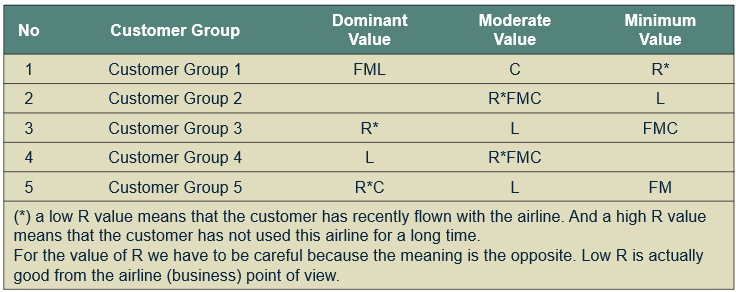

1. Customer Group 1 :
    - This is a group of customers who actually fly frequently, have a high monetary value because of their high mileage and are customers who have been in the frequent flyer program for a long time. The average discount rate is moderate. And this customer has a good recency because they recently flew with this airline.
    - Let's label this customer as **The Champions**
    
2. Customer Group 2 :
    - This customer group is a new customer (recently joined the frequent flyer program) so it has an RFMC value that is not yet high but looks potential.
    - Let's label this customer as **Potential Loyalists - New Customers**


3. Customer Group 3 :
    - This customer group is those who have been in the frequent flyer program for quite a while. However, this group actually does not use this airline very often, has a low monetary or mileage value and the average discount rate is also quite low. They also have not used this airline for a very long time.
    - Let's label this customer as **Hibernating - Low Value Customers**


4. Customer Group 4 :
    - This customer group is a customer who has been in the frequent flyer program for a long time and has a moderate RFMC score. They don't fly very often just moderate, so the other values are also moderate but actually have potential.
    - Let's label this customer as **Potential Loyalists - General Customers**


5. Customer Group 5 :
    - This customer group has been joining the frequent flyer program for a long time. They have not used this airline for a very long time and have high average discount rate. And this customer group rarely flies and has low monetary value or mileage.
    - Let's label this customer as **Hibernating - Price Sensitive Customers**

## Analyze Mean - Median Real Data

To do a better analysis of the five customer groups, we will use real data. In this case we use the data before standarization. However, because the data is log-transformed data, we will return the actual value (antilog) with the exponential formula.

In [ ]:
# we use df_IQR_LRFMC data (data before standardization)

df_IQR_LRFMC.head()

In [ ]:
# we do antilog by creating new dataframe df_cluster, and apply the formula on corresponding column

df_cluster = df_IQR_LRFMC.copy()
df_cluster['L'] = 10 ** df_IQR_LRFMC['L'] - 1
df_cluster['R'] = 10 ** df_IQR_LRFMC['R'] - 1
df_cluster['F'] = 10 ** df_IQR_LRFMC['F'] - 1
df_cluster['M'] = 10 ** df_IQR_LRFMC['M'] - 1
df_cluster['C'] = 10 ** df_IQR_LRFMC['C'] - 1
df_cluster

In [ ]:
# display mean and median for each cluster to get the real value in average and median

display(df_cluster.groupby('clusters').agg(['mean','median']))

1. Customer Group 1 (**The Champions**) :
    - It turns out that this customer group has joined ffp for about 65 months, has traveled about 40 thousand km mileage, last flew with an airline about 20 months ago, has flown with an airline about 30 times with an average discount rate of 0.7.
    
    
2. Customer Group 2 (**Potential Loyalists - New Customers**) :
    - This customer group is those who have just joined the airline for about 20 months, have only flown with the airline about 80 months before, with a frequency of 12 flights, have traveled 18 thousand km mileage with an average discount rate of 0.7.


3. Customer Group 3 (**Hibernating - Low Value Customers**) :
    - This group is those who have joined ffp for 30 months or more, their last flight was very long about 250 months ago, with a flight frequency of about 3 times, with a total mileage of about 5 thousand km and an average discount rate of 0.5.


4. Customer Group 4 (**Potential Loyalists - General Customers**) :
    - This group is similar to group 2, but this group has joined ffp longer, which is about 70 months ago.


5. Customer Group 5 (**Hibernating - Price Sensitive Customers**) :
    - This group is similar to group 3, but this group has a high average discount rate, which is around 0.8.

## Business Recommendation

Business Recommendation based on Customer Value Analysis:
1. **The Champions** - Customer Group 1
    - Airline must really take care of this customer group, because this group contributes well to the business. They can become early adopters for new airline service or program, and will help promote it. One way to keep these customers is through a reward program for this type of customer group. The reward program can also be accompanied by a kind of referral program, with the aim of providing rewards but encouraging them to promote airline brands (or certain programs).
    - Example:
        - Special reward discount + post your flight experience for additional discount for the next flight
        - More FFP points (x2/x3) for your flight + booked your flight with friends and get special discount/price
        - Book 1 for 2 - just for you - and triples your point
        - Travelling - Chilling - Healing - Saving. Flying to our new route with xx% discount + triples your ffp point. Catch additional points!!! Get more when your friends booked this route with ur refferal code.
        - My Poin Rewards - Provides convenience and various point reedem options.
        - etc.
        
        
2. **Potential Loyalists - New Customers** - Customer Group 2
    - This customer has recently joined the ffp program at this airline. However, they have potential as loyal customers in the future, as can be seen from the good RFMC value as a new customer. By building a good relationship with onboarding support and special offer programs, it may be possible to help increase their frequency and mileage.
    - Example:
        - Flight Booking assistant
        - Boost your tier by special flight discount rate with us - double your mileage now
        - Friday escape with firends to upgrade your tier
        - etc.
        
        
3. **Hibernating - Low Value Customers** - Customer Group 3
    - This customer has a fairly low value for the airline. There is a possibility that they are the type of customers who fly only because there are certain interests or events. Although the company is not obliged to focus on this type of customer, the company should still try to induce them otherwise they will be completely lost. Airline should make a program to wake them up from hibernation.
    - Example:
        - I miss u or I don't wanna lose you program. Give special discount or flight rate.
        - Can't forget u / Let's do it again/ Can't move on Program. Awake them with good memory of their last flight by giving them voucher/ code discount rate with flight routes according to their last flight.
        - etc.
    
    
4. **Potential Loyalists - General Customers** - Customer Group 4
    - This customer group is similar to group 2, but they have been in the frequent flyer program for longer. This customer has a pretty good track record but needs to be improved because they have the potential to contribute more to the company's business. The programs or campaigns that can be offered are more towards increasing engagement by telling them that they are loyalists (even though they are not champions) and influencing them to continue with us and create more shared moments.
    - Example:
        - Let's be our part forever - Give special rewards point for next booking
        - Fly more get more - doubles the points for this year (particular time period) booking
        - Share your moment with us - for additional points to boost your tier and discover the next treasure
        - etc.
    
    
5. **Hibernating - Price Sensitive Customers** - Customer Group 5
    - This customer is similar to group 3, only they seem to have a higher price sensitive. So the approach taken by the company must be more aggressive than group 3. Programs that can be provided to wake them up must be more thought-provoking with special prices or discounts and various benefits that are more attractive to them. The company can provide a typical special program with what they might have gotten before.
    - Example:
        - I want to get back together with you - This Deal is just for you
        - Don't you miss this Biggest Deal? Let's do it again!
        - etc.

# References

The following are references in working on this project.
- https://www.programmersought.com/article/63823799496/
- https://www.kaggle.com/code/felixign/airline-clustering/notebook
- https://www.kaggle.com/code/amarmaruf/homework-unsupervised-rakamin-ds8/notebook
- https://clevertap.com/blog/rfm-analysis/
- https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/